In [1]:
import pandas as pd

# Učitaj dataset
df = pd.read_csv('train.csv')

# Prikaži prvih nekoliko redova
print(df.head())


   count  hate_speech_count  offensive_language_count  neither_count  class  \
0      3                  0                         0              3      2   
1      3                  0                         3              0      1   
2      3                  0                         3              0      1   
3      3                  0                         2              1      1   
4      6                  0                         6              0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


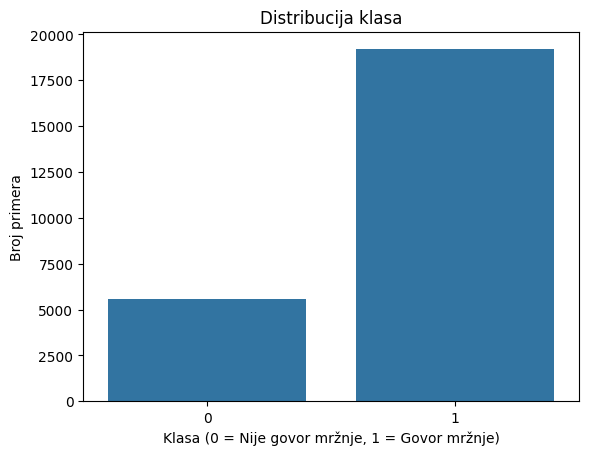

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kreiraj novu kolonu 'label' za binarnu klasifikaciju
df['label'] = df['class'].apply(lambda x: 1 if x == 1 else 0)

# Prikaži distribuciju klasa
class_counts = df['label'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribucija klasa')
plt.xlabel('Klasa (0 = Nije govor mržnje, 1 = Govor mržnje)')
plt.ylabel('Broj primera')
plt.show()


Data cleaning

In [3]:
df = df[['tweet', 'label']]


In [4]:
# Proveri nedostajuće vrednosti
print(df.isnull().sum())


tweet    0
label    0
dtype: int64


In [5]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Inicijalizacija
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Uklanjanje URL-ova
    text = re.sub(r'http\S+|www\S+', '', text)
    # Uklanjanje oznaka korisnika
    text = re.sub(r'@\w+', '', text)
    # Uklanjanje specijalnih karaktera i brojeva
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Pretvaranje u mala slova
    text = text.lower()
    # Tokenizacija
    tokens = text.split()
    # Uklanjanje stop reči i lematizacija
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Spajanje nazad u string
    text = ' '.join(tokens)
    return text

# Primena funkcije na dataset
df['cleaned_tweet'] = df['tweet'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kaca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kaca\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
df

,tweet,label,cleaned_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,0,rt woman shouldnt complain cleaning house amp ...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,rt boy dat coldtyga dwn bad cuffin dat hoe st ...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,rt dawg rt ever fuck bitch start cry confused ...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,rt look like tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,rt shit hear might true might faker bitch told ya
...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1,yous muthafin lie right tl trash mine bible sc...
24779,"you've gone and broke the wrong heart baby, an...",0,youve gone broke wrong heart baby drove rednec...
24780,young buck wanna eat!!.. dat nigguh like I ain...,1,young buck wanna eat dat nigguh like aint fuck...
24781,youu got wild bitches tellin you lies,1,youu got wild bitch tellin lie


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicijalizacija vektorizatora
vectorizer = TfidfVectorizer(max_features=5000)

# Transformacija teksta
X = vectorizer.fit_transform(df['cleaned_tweet']).toarray()
y = df['label']


In [8]:
from sklearn.model_selection import train_test_split

# Podela podataka
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Logisticka regresija
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Treniranje modela
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predikcija
y_pred = lr_model.predict(X_test)

# Evaluacija
print('Logistička regresija:')
print('Tačnost:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistička regresija:
Tačnost: 0.893483962073835
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1125
           1       0.92      0.95      0.93      3832

    accuracy                           0.89      4957
   macro avg       0.86      0.83      0.84      4957
weighted avg       0.89      0.89      0.89      4957



In [10]:
# SVM
from sklearn.svm import LinearSVC

# Treniranje modela
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predikcija
y_pred_svm = svm_model.predict(X_test)

# Evaluacija
print('SVM:')
print('Tačnost:', accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM:
Tačnost: 0.8789590478111761
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1125
           1       0.91      0.93      0.92      3832

    accuracy                           0.88      4957
   macro avg       0.83      0.81      0.82      4957
weighted avg       0.88      0.88      0.88      4957



In [11]:
from sklearn.naive_bayes import MultinomialNB

# Treniranje modela
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predikcija
y_pred_nb = nb_model.predict(X_test)

# Evaluacija
print('Naivni Bajes:')
print('Tačnost:', accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naivni Bajes:
Tačnost: 0.8450675811983054
              precision    recall  f1-score   support

           0       0.86      0.38      0.53      1125
           1       0.84      0.98      0.91      3832

    accuracy                           0.85      4957
   macro avg       0.85      0.68      0.72      4957
weighted avg       0.85      0.85      0.82      4957



In [12]:
import random
from nltk.corpus import wordnet

def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = wordnet.synsets(random_word)
        if synonyms:
            # Izaberi sinonim
            synonym = synonyms[0].lemmas()[0].name()
            # Zameni reč sinonimom
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    return ' '.join(new_words)

# Filtriraj podatke govora mržnje
hate_speech_df = df[df['label'] == 0].copy()

# Primeni augmentaciju
hate_speech_df['augmented_tweet'] = hate_speech_df['cleaned_tweet'].apply(lambda x: synonym_replacement(x, n=2))

# Kombinuj sa originalnim podacima
augmented_df = pd.concat([df, hate_speech_df[['augmented_tweet', 'label']].rename(columns={'augmented_tweet': 'cleaned_tweet'})], ignore_index=True)


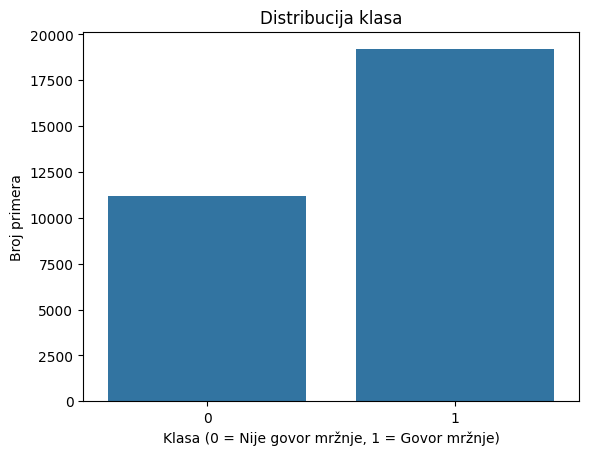

In [13]:
class_counts = augmented_df['label'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribucija klasa')
plt.xlabel('Klasa (0 = Nije govor mržnje, 1 = Govor mržnje)')
plt.ylabel('Broj primera')
plt.show()

In [14]:
augmented_df

,tweet,label,cleaned_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,0,rt woman shouldnt complain cleaning house amp ...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,rt boy dat coldtyga dwn bad cuffin dat hoe st ...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,rt dawg rt ever fuck bitch start cry confused ...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,rt look like tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,rt shit hear might true might faker bitch told ya
...,...,...,...
30371,NaN,0,know say early bird get worm put_option gluey ...
30372,NaN,0,youre nigger
30373,NaN,0,youre retard hope get type diabetes die sugar ...
30374,NaN,0,youve gone broke wrong heart baby drove rednec...


In [15]:
from sklearn.model_selection import train_test_split
# Vektorizuj novi dataset
X_aug = vectorizer.fit_transform(augmented_df['cleaned_tweet']).toarray()
y_aug = augmented_df['label']

# Podela na trening i test skup
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_aug, y_aug, test_size=0.2, random_state=42)


In [16]:
# Treniranje modela
lr_model_aug = LogisticRegression(max_iter=1000)
lr_model_aug.fit(X_train_aug, y_train_aug)

# Predikcija
y_pred_aug = lr_model_aug.predict(X_test_aug)

# Evaluacija
print('Logistička regresija sa augmentacijom:')
print('Tačnost:', accuracy_score(y_test_aug, y_pred_aug))
print(classification_report(y_test_aug, y_pred_aug))


Logistička regresija sa augmentacijom:
Tačnost: 0.9055299539170507
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2204
           1       0.93      0.92      0.93      3872

    accuracy                           0.91      6076
   macro avg       0.90      0.90      0.90      6076
weighted avg       0.91      0.91      0.91      6076



In [17]:
# Treniranje modela
svm_model_aug = LinearSVC()
svm_model_aug.fit(X_train_aug, y_train_aug)

# Predikcija
y_pred_svm_aug = svm_model_aug.predict(X_test_aug)

# Evaluacija
print('SVM sa augmentacijom:')
print('Tačnost:', accuracy_score(y_test_aug, y_pred_svm_aug))
print(classification_report(y_test_aug, y_pred_svm_aug))


SVM sa augmentacijom:
Tačnost: 0.891540487162607
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2204
           1       0.91      0.92      0.92      3872

    accuracy                           0.89      6076
   macro avg       0.88      0.88      0.88      6076
weighted avg       0.89      0.89      0.89      6076



In [18]:
# Treniranje modela
nb_model_aug = MultinomialNB()
nb_model_aug.fit(X_train_aug, y_train_aug)

# Predikcija
y_pred_nb_aug = nb_model_aug.predict(X_test_aug)

# Evaluacija
print('Naivni Bajes sa augmentacijom:')
print('Tačnost:', accuracy_score(y_test_aug, y_pred_nb_aug))
print(classification_report(y_test_aug, y_pred_nb_aug))


Naivni Bajes sa augmentacijom:
Tačnost: 0.8581303489137591
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      2204
           1       0.84      0.95      0.90      3872

    accuracy                           0.86      6076
   macro avg       0.87      0.82      0.84      6076
weighted avg       0.86      0.86      0.85      6076



In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Tokenizacija
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_tweet'])
sequences = tokenizer.texts_to_sequences(df['cleaned_tweet'])
X = pad_sequences(sequences, maxlen=100)
y = df['label']

# Podela podataka
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_shape=(100,)))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treniranje
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

# Evaluacija
loss, accuracy = model.evaluate(X_test, y_test)
print('Tačnost LSTM modela:', accuracy)


c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 85s 130ms/step - accuracy: 0.8409 - loss: 0.3632 - val_accuracy: 0.9011 - val_loss: 0.2484
Epoch 2/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 96s 155ms/step - accuracy: 0.9245 - loss: 0.2090 - val_accuracy: 0.8985 - val_loss: 0.2583
Epoch 3/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 101s 164ms/step - accuracy: 0.9404 - loss: 0.1716 - val_accuracy: 0.8969 - val_loss: 0.2831
Epoch 4/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 332s 535ms/step - accuracy: 0.9486 - loss: 0.1375 - val_accuracy: 0.8927 - val_loss: 0.3125
Epoch 5/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 68s 110ms/step - accuracy: 0.9559 - loss: 0.1111 - val_accuracy: 0.8907 - val_loss: 0.3502
155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8941 - loss: 0.3332
Tačnost LSTM modela: 0.8906596899032593


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizacija
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(augmented_df['cleaned_tweet'])
sequences = tokenizer.texts_to_sequences(augmented_df['cleaned_tweet'])
X = pad_sequences(sequences, maxlen=100)
y = augmented_df['label']

# Podela podataka
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_shape=(100,)))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treniranje
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

# Evaluacija
loss, accuracy = model.evaluate(X_test, y_test)
print('Tačnost LSTM modela:', accuracy)


Epoch 1/5
760/760 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8267 - loss: 0.3888

KeyboardInterrupt: 

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Provera verzija
print("TensorFlow verzija:", tf.__version__)
import transformers
print("Transformers verzija:", transformers.__version__)

# Tokenizacija
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Priprema ulaza za model
encoded_inputs = tokenizer(
    df['cleaned_tweet'].tolist(),
    padding=True,
    truncation=True,
    max_length=128,  # Ograničenje dužine sekvence
    return_tensors='tf'
)

# Ekstrakcija ulaznih ID-ova i maski
input_ids = encoded_inputs['input_ids']
attention_masks = encoded_inputs['attention_mask']
labels = df['label'].values

# Podela podataka na trening i test skup
X_train_ids, X_test_ids, X_train_masks, X_test_masks, y_train, y_test = train_test_split(
    input_ids,
    attention_masks,
    labels,
    test_size=0.2,
    random_state=42
)

# Kreiranje Dataset objekata za trening i test skupove
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': X_train_ids,
        'attention_mask': X_train_masks
    },
    y_train
)).shuffle(len(X_train_ids)).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': X_test_ids,
        'attention_mask': X_test_masks
    },
    y_test
)).batch(16)

# Inicijalizacija modela
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Kompajliranje modela
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Treniranje modela
model.fit(train_dataset, epochs=2, validation_data=test_dataset)

# Evaluacija modela
loss, accuracy = model.evaluate(test_dataset)
print('Tačnost BERT modela:', accuracy)


In [ ]:
import tensorflow as tf
import transformers
print("TensorFlow verzija:", tf.__version__)
print("Transformers verzija:", transformers.__version__)

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Tokenizacija
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoded_inputs = tokenizer(augmented_df['cleaned_tweet'].tolist(), padding=True, truncation=True, return_tensors='tf')

# Model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Podela podataka
train_dataset = tf.data.Dataset.from_tensor_slices((dict(encoded_inputs), augmented_df['label'].values))
train_dataset = train_dataset.shuffle(len(augmented_df)).batch(16)

# Treniranje
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])
model.fit(train_dataset, epochs=2)

# Evaluacija
# Napomena: Za evaluaciju ćeš morati da podeliš podatke na trening i test skup kao i prethodno
